<a href="https://colab.research.google.com/github/lonerat/machinelearningcode/blob/main/ML_Sydney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hello!



Install scikit learn library



In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn import datasets


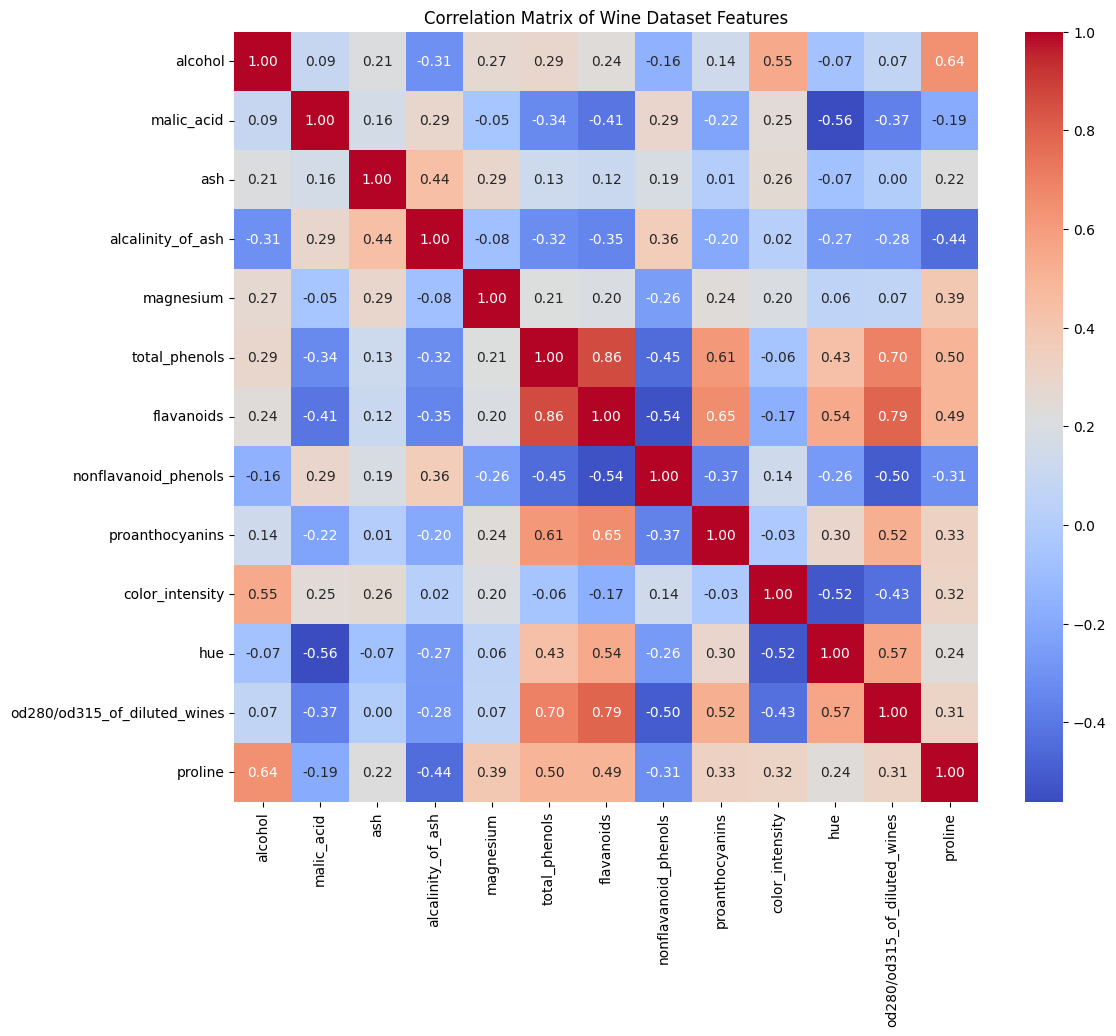

In [ ]:
# Step 1: Load the dataset
wine = datasets.load_wine()
#wine = datasets.load_diabetes()
#wine = datasets.load_iris()
#wine = datasets.load_digits()
#wine = datasets.load_linnerud()

X = wine.data  # Features (chemical properties of wine)
y = wine.target  # Labels (types of wine)

# Convert to a DataFrame for better handling
df = pd.DataFrame(X, columns=wine.feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=wine.feature_names, yticklabels=wine.feature_names)
plt.title("Correlation Matrix of Wine Dataset Features")
plt.show()

In [ ]:
# Step 2: Explore the dataset
print("Feature Names:", wine.feature_names)
print("Target Names:", wine.target_names)
print("Dataset Shape:", X.shape)

Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']
Dataset Shape: (178, 13)


In [ ]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Step 4: Normalize the feature values (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4

    accuracy                           0.94        18
   macro avg       0.93      0.95      0.94        18
weighted avg       0.96      0.94      0.95        18



<ipython-input-16-a9dcd9d122c4>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_values, y=feature_names, palette="viridis")


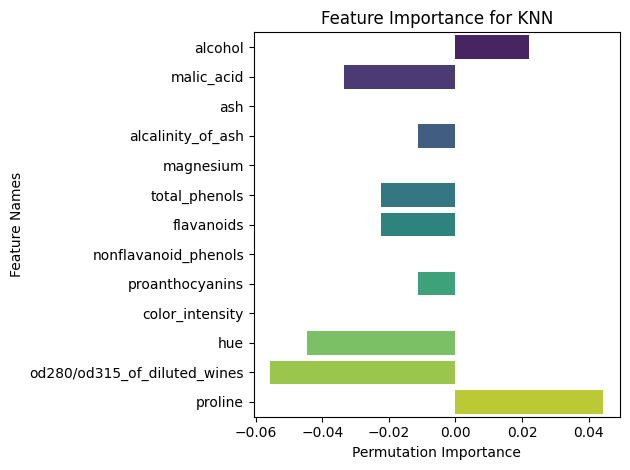

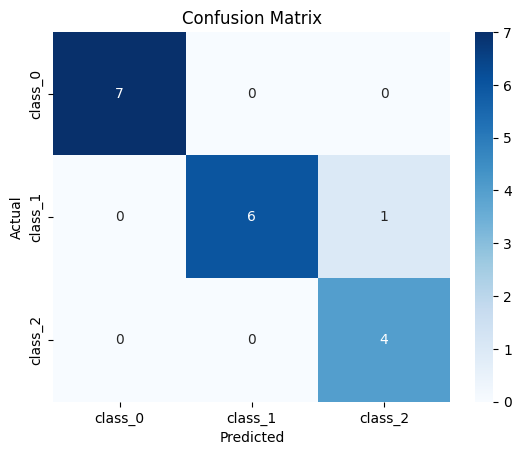

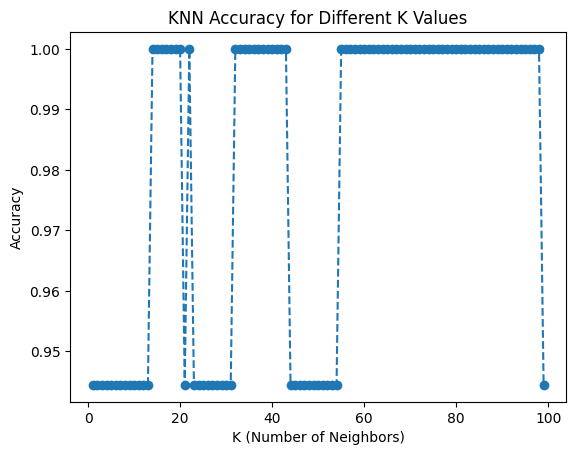

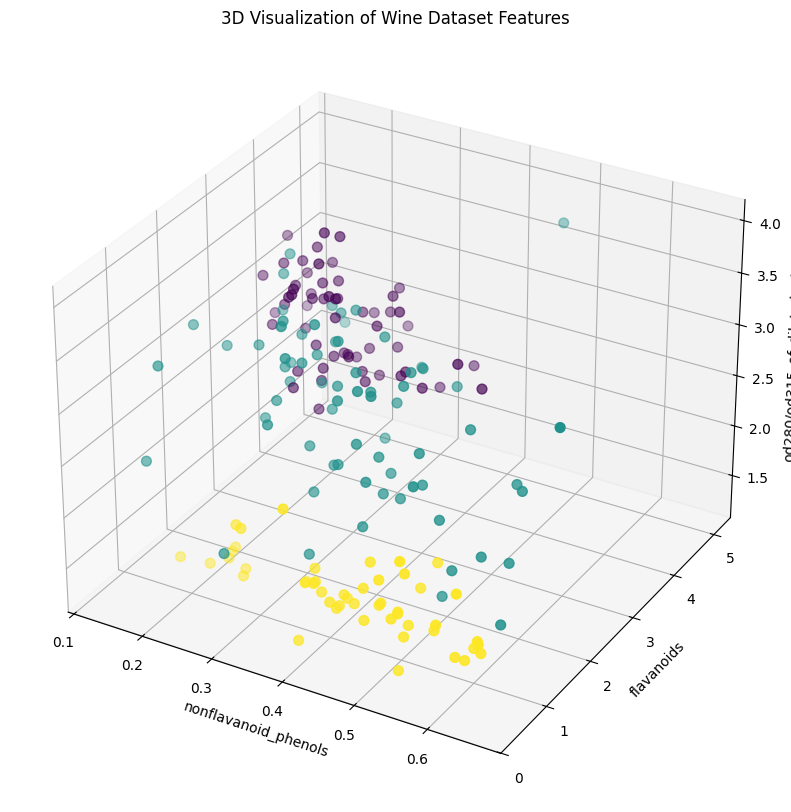

In [ ]:
# Step 5: Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = knn.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Perform permutation importance analysis
perm_importance = permutation_importance(knn, X_test, y_test, scoring='accuracy', random_state=42)

# Extract importance and feature names
importance_values = perm_importance.importances_mean
feature_names = wine.feature_names

# Step 9: Visualize feature importance
plt.figure()
sns.barplot(x=importance_values, y=feature_names, palette="viridis")
plt.xlabel('Permutation Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance for KNN')
plt.tight_layout()
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 10: Visualize the results
plt.figure()
k_values = range(1, 100)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

# Step 11: 3D Visualization of three random features
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Select three random features
feature_indices = np.random.choice(X.shape[1], 3, replace=False)
X_3d = X[:, feature_indices]

# Scatter plot
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis', s=50)

ax.set_xlabel(wine.feature_names[feature_indices[0]])
ax.set_ylabel(wine.feature_names[feature_indices[1]])
ax.set_zlabel(wine.feature_names[feature_indices[2]])
ax.set_title('3D Visualization of Wine Dataset Features')

plt.show()